## 1. Data Preprocessing

#### 1.1 Importing packages and modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

import time

#### 1.2 데이터 불러오기

In [2]:
smoking = pd.read_csv('../data/Smoking_raw/smoking.csv')
pd.set_option('display.max_columns',30)
smoking.head()

ID gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0   0      F   40         155          60       81.3             1.2   
1   1      F   40         160          60       81.0             0.8   
2   2      M   55         170          60       80.0             0.8   
3   3      M   40         165          70       88.0             1.5   
4   4      F   40         155          60       86.0             1.0   

   eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  \
0              1.0            1.0             1.0     114.0        73.0   
1              0.6            1.0             1.0     119.0        70.0   
2              0.8            1.0             1.0     138.0        86.0   
3              1.5            1.0             1.0     100.0        60.0   
4              1.0            1.0             1.0     120.0        74.0   

   fasting blood sugar  Cholesterol  triglyceride   HDL    LDL  hemoglobin  \
0                 94.0        215.0          82.0  73.0  126.0        12.9   
1                130.0        192.0         115.0  42.0  127.0        12.7   
2                 89.0        242.0         182.0  55.0  151.0        15.8   
3                 96.0        322.0         254.0  45.0  226.0        14.7   
4                 80.0        184.0          74.0  62.0  107.0        12.5   

   Urine protein  serum creatinine   AST   ALT   Gtp oral  dental caries  \
0            1.0               0.7  18.0  19.0  27.0    Y              0   
1            1.0               0.6  22.0  19.0  18.0    Y              0   
2            1.0               1.0  21.0  16.0  22.0    Y              0   
3            1.0               1.0  19.0  26.0  18.0    Y              0   
4            1.0               0.6  16.0  14.0  22.0    Y              0   

  tartar  smoking  
0      Y        0  
1      Y        0  
2      N        1  
3      Y        0  
4      N        0

In [3]:
smoking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

In [4]:
print("\nThere are totally {} null values in the dataset".format(smoking.isnull().sum().sum())) # for checking null counts


There are totally 0 null values in the dataset


#### 1.3 전처리 함수 생성

In [5]:
def preprocessing(df_scaling):
    # Remove columns not necessary
    if 'ID' in df_scaling:
        df_scaling = df_scaling.drop("ID", axis = 1)
        if len(df_scaling.columns) == 1:
            return df_scaling
        
        # Oral(=구강검사 여부) 특성값은 모두 Y 값이므로 삭제.
        df_scaling = df_scaling.drop('oral', axis = 1) 
        
        # Categorical features label encoding
        cate_features = df_scaling[['gender','tartar']]

        lbe = LabelEncoder()
        lbe.fit_transform(df_scaling["gender"])
        df_scaling["gender"] = lbe.fit_transform(df_scaling["gender"])

        lbe = LabelEncoder()
        lbe.fit_transform(df_scaling["tartar"])
        df_scaling["tartar"] = lbe.fit_transform(df_scaling["tartar"])
        
        # hearing feature converting values 1, 2 => 1, 0
        df_scaling['hearing(left)'] = df_scaling['hearing(left)'].apply(lambda x: x-2 if x == 2.0 else x )
        df_scaling['hearing(right)'] = df_scaling['hearing(right)'].apply(lambda x: x-2 if x == 2.0 else x )
        
        # BMI 지수 계산 : bmi = kg/m^2
        df_scaling['bmi'] = df_scaling['weight(kg)']/((df_scaling['height(cm)']*0.01)**2)
        # wwi(비만 지수) 지수 계산 : wwi = cm/sqrt(kg)
        df_scaling['wwi'] = df_scaling['waist(cm)']/(df_scaling['weight(kg)'].apply(np.sqrt))

    return df_scaling

In [7]:
df = preprocessing(smoking)
df

gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0           0   40         155          60       81.3             1.2   
1           0   40         160          60       81.0             0.8   
2           1   55         170          60       80.0             0.8   
3           1   40         165          70       88.0             1.5   
4           0   40         155          60       86.0             1.0   
...       ...  ...         ...         ...        ...             ...   
55687       0   40         170          65       75.0             0.9   
55688       0   45         160          50       70.0             1.2   
55689       0   55         160          50       68.5             1.0   
55690       1   60         165          60       78.0             0.8   
55691       1   55         160          65       85.0             0.9   

       eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  \
0                  1.0            1.0             1.0     114.0        73.0   
1                  0.6            1.0             1.0     119.0        70.0   
2                  0.8            1.0             1.0     138.0        86.0   
3                  1.5            1.0             1.0     100.0        60.0   
4                  1.0            1.0             1.0     120.0        74.0   
...                ...            ...             ...       ...         ...   
55687              0.9            1.0             1.0     110.0        68.0   
55688              1.2            1.0             1.0     101.0        62.0   
55689              1.2            1.0             1.0     117.0        72.0   
55690              1.0            1.0             1.0     133.0        76.0   
55691              0.7            1.0             1.0     124.0        75.0   

       fasting blood sugar  Cholesterol  triglyceride   HDL    LDL  \
0                     94.0        215.0          82.0  73.0  126.0   
1                    130.0        192.0         115.0  42.0  127.0   
2                     89.0        242.0         182.0  55.0  151.0   
3                     96.0        322.0         254.0  45.0  226.0   
4                     80.0        184.0          74.0  62.0  107.0   
...                    ...          ...           ...   ...    ...   
55687                 89.0        213.0          99.0  75.0  118.0   
55688                 89.0        166.0          69.0  73.0   79.0   
55689                 88.0        158.0          77.0  79.0   63.0   
55690                107.0        210.0          79.0  48.0  146.0   
55691                 82.0        213.0         142.0  34.0  150.0   

       hemoglobin  Urine protein  serum creatinine   AST   ALT   Gtp  \
0            12.9            1.0               0.7  18.0  19.0  27.0   
1            12.7            1.0               0.6  22.0  19.0  18.0   
2            15.8            1.0               1.0  21.0  16.0  22.0   
3            14.7            1.0               1.0  19.0  26.0  18.0   
4            12.5            1.0               0.6  16.0  14.0  22.0   
...           ...            ...               ...   ...   ...   ...   
55687        12.3            1.0               0.6  14.0   7.0  10.0   
55688        14.0            1.0               0.9  20.0  12.0  14.0   
55689        12.4            1.0               0.5  17.0  11.0  12.0   
55690        14.4            1.0               0.7  20.0  19.0  18.0   
55691        15.0            1.0               0.8  26.0  29.0  41.0   

       dental caries  tartar  smoking        bmi        wwi  
0                  0       1        0  24.973985  10.495785  
1                  0       1        0  23.437500  10.457055  
2                  0       0        1  20.761246  10.327956  
3                  0       1        0  25.711662  10.518012  
4                  0       0        0  24.973985  11.102552  
...              ...     ...      ...        ...        ...  
55687              1       1        0  22

In [12]:
# !pip install Jinja2

     -------------------------------------- 133.1/133.1 kB 4.0 MB/s eta 0:00:00


In [13]:
df.corr().style.background_gradient(cmap='magma')

Competition Format

In [14]:
# competition_format
x_train = pd.read_csv('../data/Smoking_raw/competition_format/x_train.csv')
x_test = pd.read_csv('../data/Smoking_raw/competition_format/x_test.csv')
y_train = pd.read_csv('../data/Smoking_raw/competition_format/y_train.csv')
y_test = pd.read_csv('../data/Smoking_raw/competition_format/y_test.csv')

In [15]:
x_train = preprocessing(x_train)
x_test = preprocessing(x_test)
y_train = preprocessing(y_train)
y_test = preprocessing(y_test)

#### 1.4 Scaler 함수 생성

In [16]:
def scaling(train_data, test_data, scaled_form = 'MinMaxScaler()'):
    # 형태 별 특성 구분
    train_data = preprocessing(train_data)
    test_data = preprocessing(test_data)
    tr_cate_features = train_data[['gender', 'tartar', 'hearing(right)', 'hearing(left)', 'dental caries']]
    tr_scaled_features = train_data.drop(tr_cate_features.columns, axis=1)
    
    ts_cate_features = test_data[['gender', 'tartar', 'hearing(right)', 'hearing(left)', 'dental caries']]
    ts_scaled_features = test_data.drop(ts_cate_features.columns, axis=1)
    
    if scaled_form == 'StandardScaler()':
        # Standard scaler
        scaler = StandardScaler()
        scaler.fit(tr_scaled_features) # 훈련 데이터에 fit() 적용
        
        # 훈련 데이터와 테스트 데이터에 transform()을 통해 변환
        tr_scaled = scaler.transform(tr_scaled_features)
        ts_scaled = scaler.transform(ts_scaled_features)
        
        train_std_scaled = pd.DataFrame(tr_scaled, columns=tr_scaled_features.columns)
        train_std_scaled[tr_cate_features.columns] = tr_cate_features
        
        test_std_scaled = pd.DataFrame(ts_scaled, columns=ts_scaled_features.columns)
        test_std_scaled[ts_cate_features.columns] = ts_cate_features
        
        return train_std_scaled, test_std_scaled
    
    elif scaled_form == 'RobustScaler()':
        # Robust scaler
        scaler = RobustScaler()
        scaler.fit(tr_scaled_features) # 훈련 데이터에 fit() 적용
        
        # 훈련 데이터와 테스트 데이터에 transform()을 통해 변환
        tr_scaled = scaler.transform(tr_scaled_features)
        ts_scaled = scaler.transform(ts_scaled_features)
        
        # 데이터 프레임 형태로 변환
        train_robust_scaled = pd.DataFrame(tr_scaled, columns=tr_scaled_features.columns)
        train_robust_scaled[tr_cate_features.columns] = tr_cate_features
        
        test_robust_scaled = pd.DataFrame(ts_scaled, columns=ts_scaled_features.columns)
        test_robust_scaled[ts_cate_features.columns] = ts_cate_features
        
        return train_robust_scaled, test_robust_scaled
        
    else:
        # MinMax scaler
        scaler = MinMaxScaler()
        scaler.fit(tr_scaled_features) # 훈련 데이터에 fit() 적용
        
        # 훈련 데이터와 테스트 데이터에 transform()을 통해 변환
        tr_scaled = scaler.transform(tr_scaled_features)
        ts_scaled = scaler.transform(ts_scaled_features)
        
        # 데이터 프레임 형태로 변환
        train_mmx_scaled = pd.DataFrame(tr_scaled, columns = tr_scaled_features.columns)
        train_mmx_scaled[tr_cate_features.columns] = tr_cate_features
        
        test_mmx_scaled = pd.DataFrame(ts_scaled,columns = ts_scaled_features.columns)
        test_mmx_scaled[ts_cate_features.columns] = ts_cate_features

        return train_mmx_scaled, test_mmx_scaled

In [17]:
x_train, x_test = scaling(x_train, x_test, 'StandardScaler()')
# x_train, x_test = scaling(x_train, x_test, 'RobustScaler()')
# x_train, x_test = scaling(x_train, x_test)

In [18]:
x_train

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0     -0.348302   -1.049853   -0.458800  -0.083771        0.385691   
1     -0.348302   -0.506284   -0.458800  -0.116105       -0.433770   
2      0.892501    0.580854   -0.458800  -0.223885       -0.433770   
3     -0.348302    0.037285    0.321016   0.638353        1.000286   
4     -0.348302   -1.049853   -0.458800   0.422793       -0.024040   
...         ...         ...         ...        ...             ...   
44548  0.478900    0.580854   -0.068892   0.638353        0.385691   
44549 -0.761903    1.124422    0.321016   0.207234       -0.843500   
44550 -0.761903    1.124422    0.321016  -1.204680        1.000286   
44551  0.478900    0.037285    1.880649   2.664611       -0.433770   
44552 -1.589105    1.124422    1.100832   1.198807        0.385691   

       eyesight(right)  systolic  relaxation  fasting blood sugar  \
0            -0.016643 -0.550024   -0.313914            -0.255217   
1            -0.835046 -0.184756   -0.623346             1.471806   
2            -0.425844  1.203261    1.026958            -0.495081   
3             1.006362 -1.572773   -1.654787            -0.159271   
4            -0.016643 -0.111703   -0.210770            -0.926837   
...                ...       ...         ...                  ...   
44548         0.392559  1.933796    1.852111             0.128566   
44549        -0.630445 -1.207506   -0.210770            -0.543054   
44550         1.006362 -0.403917   -0.623346            -0.207244   
44551        -1.039647  0.034404   -0.107626            -0.399135   
44552         1.006362  0.180511   -0.004482            -1.022783   

       Cholesterol  triglyceride       HDL       LDL  hemoglobin  \
0         0.494320     -0.624508  1.061947  0.267783   -1.100546   
1        -0.137158     -0.163686 -1.033346  0.292210   -1.228353   
2         1.235620      0.771922 -0.154675  0.878471    0.752662   
3         3.432064      1.777351 -0.830575  2.710536    0.049721   
4        -0.356803     -0.736223  0.318456 -0.196340   -1.356160   
...            ...           ...       ...       ...         ...   
44548    -0.411714      0.576422 -1.168526 -0.171913    0.369240   
44549    -0.274436     -0.931723 -0.019494  0.072363    0.369240   
44550    -1.427569     -0.959651 -1.100936 -0.562753   -0.781027   
44551    -0.494080      0.171457 -0.695395 -0.269623   -0.078086   
44552     0.000120     -1.057401 -0.560215  0.560913   -2.059101   

       Urine protein  serum creatinine       AST       ALT       Gtp  \
0          -0.214896         -0.823115 -0.430331 -0.254602 -0.257586   
1          -0.214896         -1.265418 -0.220763 -0.254602 -0.435020   
2          -0.214896          0.503794 -0.273155 -0.349076 -0.356161   
3          -0.214896          0.503794 -0.377939 -0.034160 -0.435020   
4          -0.214896         -1.265418 -0.535115 -0.412060 -0.356161   
...              ...               ...       ...       ...       ...   
44548      -0.214896          0.503794  0.984253  0.690148  0.215573   
44549      -0.214896          0.061491 -0.325547 -0.412060 -0.474450   
44550      -0.214896          0.503794 -0.430331 -0.254602 -0.592740   
44551      -0.214896          0.061491  0.198373  0.690148 -0.001292   
44552      -0.214896          0.503794 -0.168371 -0.506535 -0.395590   

            bmi       wwi  gender  tartar  hearing(right)  hearing(left)  \
0      0.231311  0.502492       0       1             1.0            1.0   
1     -0.210748  0.444016       0       1             1.0            1.0   
2     -0.980727  0.249093       1       0             1.0            1.0   
3      0.443546  0.536052       1       1             1.0            1.0   
4      0.231311  1.418627       0       0             1.0            1.0   
...         ...       ...     ...     ...             ...            ...   
44548 -0.482963  1.135535       1       1             1.0            1.0   
44549 -0.377721 -0.185800       1       1           

In [19]:
x_test

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0      2.960507   -0.506284   -0.068892   0.961692       -0.228905   
1     -1.175504    0.037285    1.880649   1.716150        1.000286   
2     -0.348302    0.580854    0.710924  -0.116105        1.000286   
3     -0.761903    1.124422    0.321016  -0.223885       -0.024040   
4     -0.761903   -0.506284    0.710924   1.177251       -0.024040   
...         ...         ...         ...        ...             ...   
11134 -0.348302    0.580854   -0.068892  -0.762784       -0.228905   
11135  0.065299   -0.506284   -1.238617  -1.301682        0.385691   
11136  0.892501   -0.506284   -1.238617  -1.463352       -0.024040   
11137  1.306103    0.037285   -0.458800  -0.439445       -0.433770   
11138  0.892501   -0.506284   -0.068892   0.315013       -0.228905   

       eyesight(right)  systolic  relaxation  fasting blood sugar  \
0            -0.630445 -0.111703    0.408094             0.608295   
1             1.006362  1.057153    0.717526            -0.159271   
2             1.006362  1.203261    1.026958            -0.351163   
3            -0.016643  2.810438    2.470975             0.032620   
4             0.392559  0.253565    0.408094             0.848159   
...                ...       ...         ...                  ...   
11134        -0.221243 -0.842238   -0.829634            -0.495081   
11135         0.392559 -1.499720   -1.448499            -0.495081   
11136         0.392559 -0.330863   -0.417058            -0.543054   
11137        -0.016643  0.837993   -0.004482             0.368431   
11138        -0.630445  0.180511   -0.107626            -0.830891   

       Cholesterol  triglyceride       HDL       LDL  hemoglobin  \
0        -0.768636     -0.833973  0.250866 -0.513898   -0.078086   
1         1.263075     -0.373151  0.048096  1.220456    0.624854   
2        -0.933369      1.232744 -1.371296 -0.416188    1.136084   
3         1.400353      0.674172 -0.289855  1.098319    0.433143   
4         0.439408     -0.191615  0.048096  0.414348    0.049721   
...            ...           ...       ...       ...         ...   
11134     0.439408     -0.387115  1.197127  0.072363   -1.483968   
11135    -0.851003     -0.806044  1.061947 -0.880311   -0.397605   
11136    -1.070647     -0.694330  1.467488 -1.271152   -1.420064   
11137     0.357042     -0.666401 -0.627805  0.756333   -0.141990   
11138     0.439408      0.213350 -1.574066  0.854044    0.241432   

       Urine protein  serum creatinine       AST       ALT       Gtp  \
0          -0.214896          0.503794  0.145981 -0.254602 -0.021007   
1          -0.214896          0.061491 -0.325547  0.312248 -0.119581   
2          -0.214896         -0.823115 -0.063587  0.154790  0.649301   
3          -0.214896         -0.823115  0.198373  0.879098  0.195858   
4          -0.214896          0.946097  0.460333  0.973573  0.314147   
...              ...               ...       ...       ...       ...   
11134      -0.214896         -1.265418 -0.639899 -0.632501 -0.592740   
11135      -0.214896          0.061491 -0.325547 -0.475043 -0.513880   
11136      -0.214896         -1.707721 -0.482723 -0.506535 -0.553310   
11137      -0.214896         -0.823115 -0.325547 -0.254602 -0.435020   
11138      -0.214896         -0.380812 -0.011195  0.060315  0.018423   

            bmi       wwi  gender  tartar  hearing(right)  hearing(left)  \
0      0.351181  1.697360       1       0             1.0            1.0   
1      2.557101  0.252342       1       0             1.0            1.0   
2      0.512566 -1.222842       1       0             1.0            1.0   
3     -0.377721 -0.907652       1       0             1.0            1.0   
4      1.475039  0.869283       1       0             1.0            1.0   
...         ...       ...     ...     ...             ...            ...   
11134 -0.482963 -1.299044       0       1             1.0            1.0   
11135 -1.334606 -0.397823       0       1           

array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'height(cm)'}>,
        <AxesSubplot: title={'center': 'weight(kg)'}>,
        <AxesSubplot: title={'center': 'waist(cm)'}>,
        <AxesSubplot: title={'center': 'eyesight(left)'}>],
       [<AxesSubplot: title={'center': 'eyesight(right)'}>,
        <AxesSubplot: title={'center': 'systolic'}>,
        <AxesSubplot: title={'center': 'relaxation'}>,
        <AxesSubplot: title={'center': 'fasting blood sugar'}>,
        <AxesSubplot: title={'center': 'Cholesterol'}>],
       [<AxesSubplot: title={'center': 'triglyceride'}>,
        <AxesSubplot: title={'center': 'HDL'}>,
        <AxesSubplot: title={'center': 'LDL'}>,
        <AxesSubplot: title={'center': 'hemoglobin'}>,
        <AxesSubplot: title={'center': 'Urine protein'}>],
       [<AxesSubplot: title={'center': 'serum creatinine'}>,
        <AxesSubplot: title={'center': 'AST'}>,
        <AxesSubplot: title={'center': 'ALT'}>,
        <AxesSu

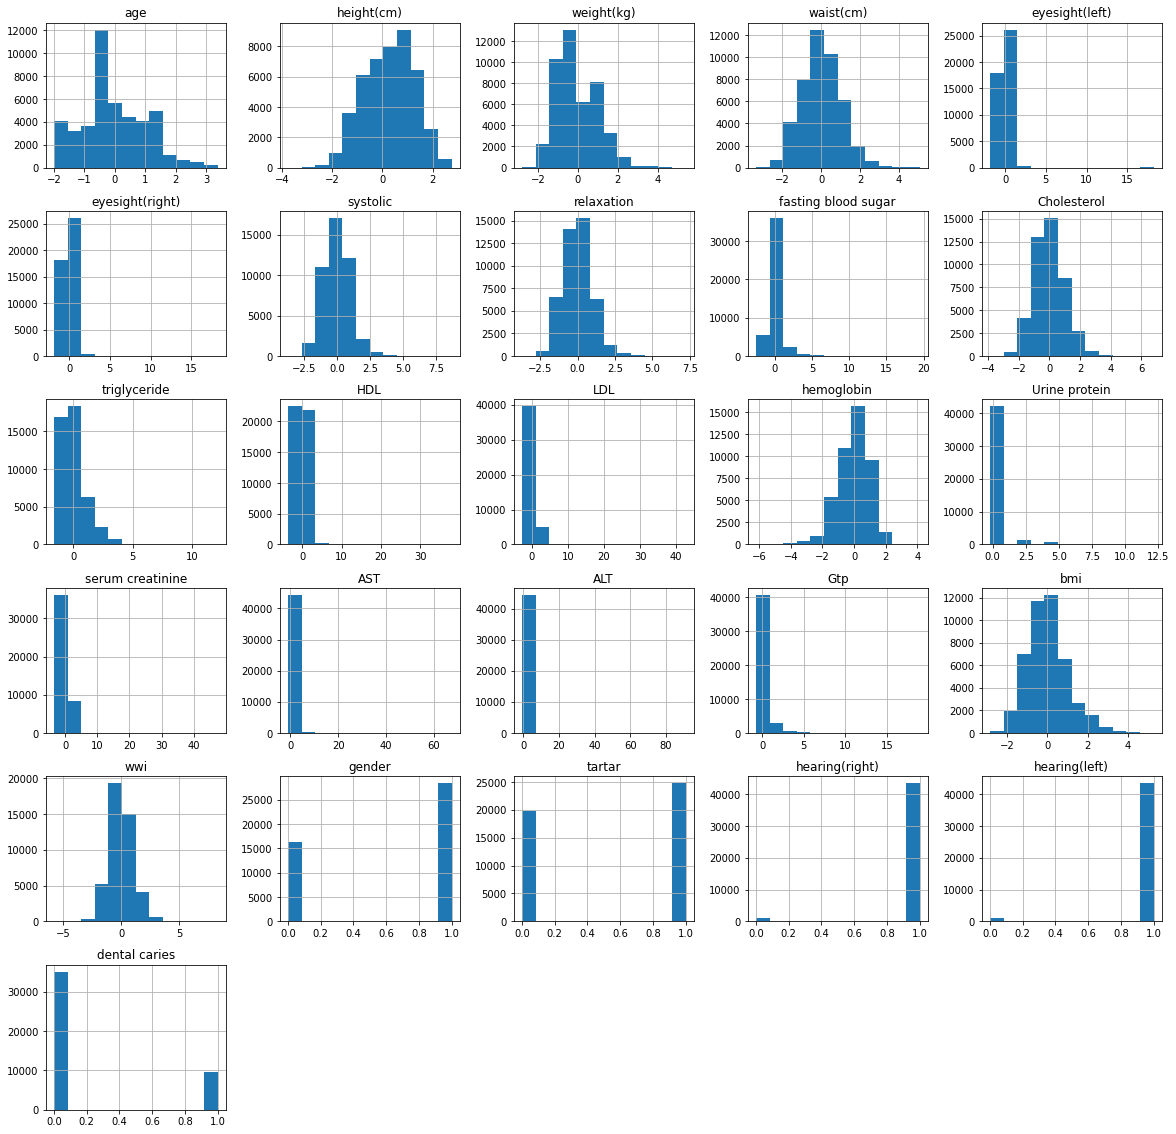

In [20]:
# x_train 시각화
x_train.hist(figsize = (20, 20), bins = 12, legend=False)

array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'height(cm)'}>,
        <AxesSubplot: title={'center': 'weight(kg)'}>,
        <AxesSubplot: title={'center': 'waist(cm)'}>,
        <AxesSubplot: title={'center': 'eyesight(left)'}>],
       [<AxesSubplot: title={'center': 'eyesight(right)'}>,
        <AxesSubplot: title={'center': 'systolic'}>,
        <AxesSubplot: title={'center': 'relaxation'}>,
        <AxesSubplot: title={'center': 'fasting blood sugar'}>,
        <AxesSubplot: title={'center': 'Cholesterol'}>],
       [<AxesSubplot: title={'center': 'triglyceride'}>,
        <AxesSubplot: title={'center': 'HDL'}>,
        <AxesSubplot: title={'center': 'LDL'}>,
        <AxesSubplot: title={'center': 'hemoglobin'}>,
        <AxesSubplot: title={'center': 'Urine protein'}>],
       [<AxesSubplot: title={'center': 'serum creatinine'}>,
        <AxesSubplot: title={'center': 'AST'}>,
        <AxesSubplot: title={'center': 'ALT'}>,
        <AxesSu

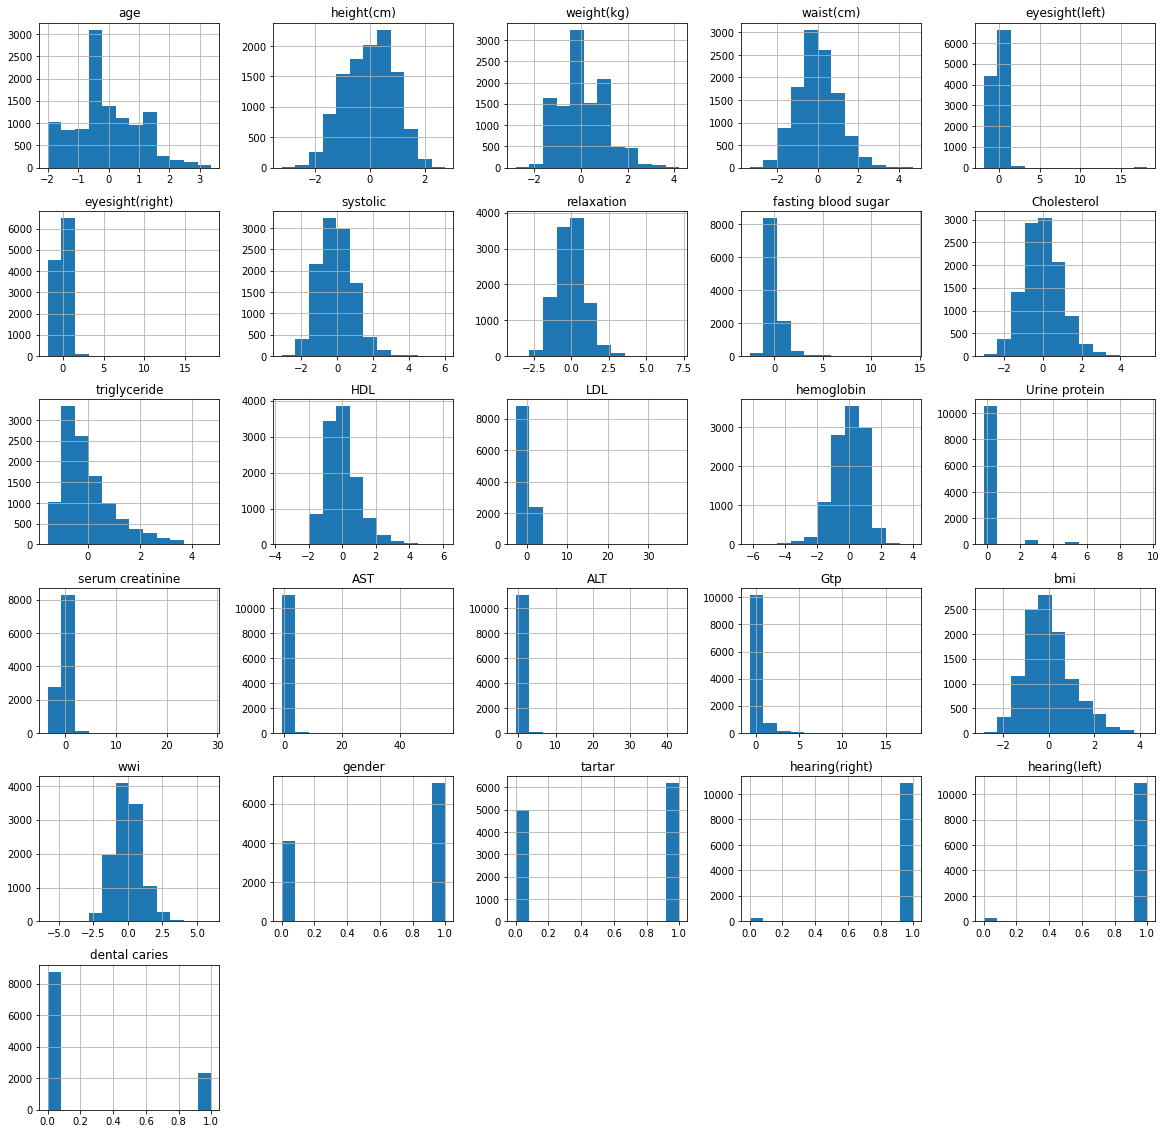

In [21]:
# x_test 시각화
x_test.hist(figsize = (20, 20), bins = 12, legend=False)

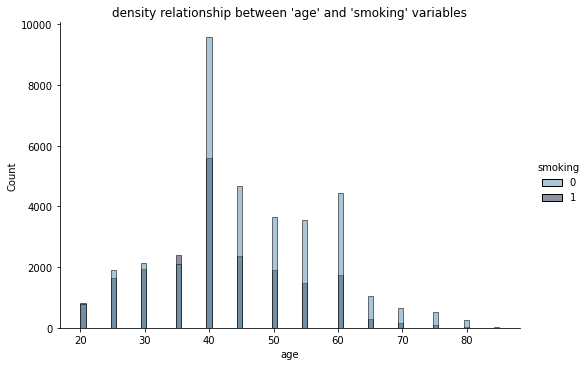

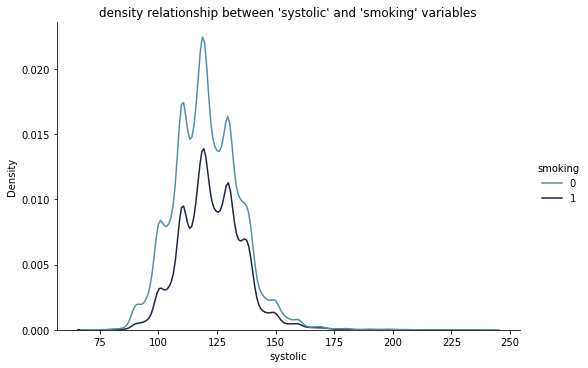

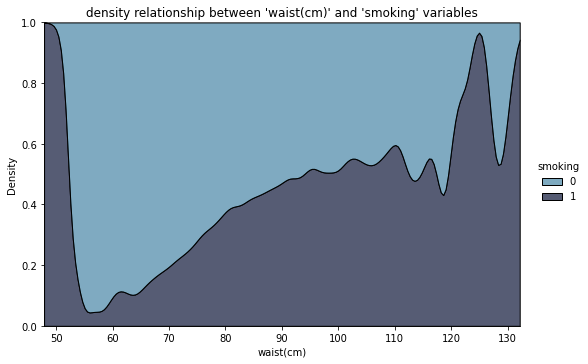

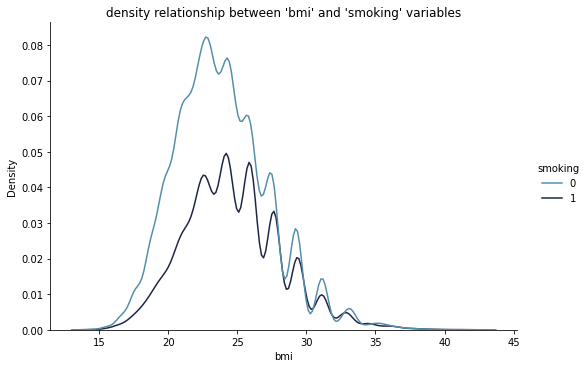

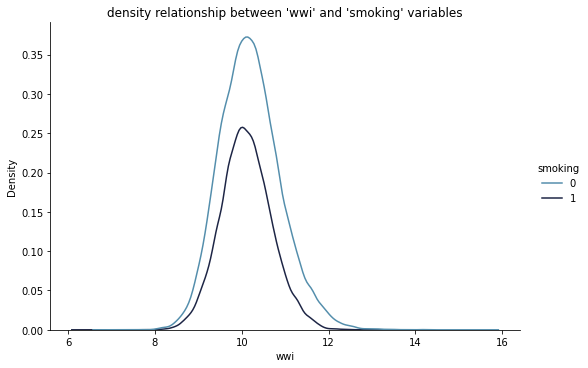

In [22]:
sns.displot(
    data = df, x = "age", hue = "smoking",
    kind = "hist", height = 5, aspect = 1.5,
    palette="ch:rot=-.25,hue=1,light=.50").set(title =  "density relationship between 'age' and 'smoking' variables");


sns.displot(
    data = df, x = "systolic", hue = "smoking",
    kind = "kde", height = 5, aspect = 1.5,
    palette="ch:rot=-.25,hue=1,light=.50").set(title = "density relationship between 'systolic' and 'smoking' variables");


sns.displot(
    data = df, x = "waist(cm)", hue = "smoking",
    kind = "kde", height = 5, aspect = 1.5, multiple="fill",
    palette="ch:rot=-.25,hue=1,light=.50").set(title = "density relationship between 'waist(cm)' and 'smoking' variables");

sns.displot(
    data = df, x = "bmi", hue = "smoking",
    kind = "kde", height = 5, aspect = 1.5,
    palette="ch:rot=-.25,hue=1,light=.50").set(title = "density relationship between 'bmi' and 'smoking' variables");

sns.displot(
    data = df, x = "wwi", hue = "smoking",
    kind = "kde", height = 5, aspect = 1.5,
    palette="ch:rot=-.25,hue=1,light=.50").set(title = "density relationship between 'wwi' and 'smoking' variables");

## 2. XGBoost

#### 2.1 Python wrapper를 사용한 XGB 모델

In [25]:
# !pip install xgboost

     -------------------------------------- 125.4/125.4 MB 9.0 MB/s eta 0:00:00


In [51]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import confusion_matrix, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve

# adjusting data into DMatirx type
dtrain = xgb.DMatrix(data=x_train,label=y_train,feature_names=x_train.columns)
dtest = xgb.DMatrix(data=x_test,label=y_test,feature_names=x_train.columns)

In [31]:
params = {'max-depth':3,
          'eta':0.1, # XGBClassifier일 경우 learning_rate 로 쓴다
          'objective':'binary:logistic', #목적함수 : 0 or 1 이므로 이진 로지스틱 사용
          'eval_metric':'logloss', # 오류 함수의 평가 성능 지표 : logloss
          'early_stoppings':100, #100회이상 시행시에도 오류가 내려가지않으면 중단
          'silent' : 0,
          'verbosity':0
} # 트리 깊이 최대 3 , 학습률 0.1 , 
num_rounds = 2000

In [32]:
wlist = [(dtrain,'train'),(dtest,'eval')]
start = time.time()
xgb_model = xgb.train(params = params, dtrain=dtrain,num_boost_round= num_rounds,
                      early_stopping_rounds=100,evals = wlist)
end = time.time()
print("XGB 수행 시간: {0:.1f} 초 ".format(end - start)) # 29.1 sec
pred_probs = xgb_model.predict(dtest)
preds = [1 if x > 0.5 else 0 for x in pred_probs]
print('분류 결과 : {0:.1f} '.format(accuracy_score(y_test,preds)))

[0]	train-logloss:0.65857	eval-logloss:0.65794
[1]	train-logloss:0.62994	eval-logloss:0.62888
[2]	train-logloss:0.60586	eval-logloss:0.60428
[3]	train-logloss:0.58568	eval-logloss:0.58370
[4]	train-logloss:0.56833	eval-logloss:0.56601
[5]	train-logloss:0.55341	eval-logloss:0.55083
[6]	train-logloss:0.54039	eval-logloss:0.53766
[7]	train-logloss:0.52910	eval-logloss:0.52611
[8]	train-logloss:0.51928	eval-logloss:0.51616
[9]	train-logloss:0.51068	eval-logloss:0.50736
[10]	train-logloss:0.50292	eval-logloss:0.49941
[11]	train-logloss:0.49610	eval-logloss:0.49251
[12]	train-logloss:0.49021	eval-logloss:0.48650
[13]	train-logloss:0.48484	eval-logloss:0.48110
[14]	train-logloss:0.47989	eval-logloss:0.47604
[15]	train-logloss:0.47556	eval-logloss:0.47157
[16]	train-logloss:0.47179	eval-logloss:0.46773
[17]	train-logloss:0.46828	eval-logloss:0.46418
[18]	train-logloss:0.46507	eval-logloss:0.46094
[19]	train-logloss:0.46214	eval-logloss:0.45802
[20]	train-logloss:0.45948	eval-logloss:0.45532
[2

In [33]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test,pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [34]:
get_clf_eval(y_test, preds, pred_probs)

오차 행렬
[[6979   57]
 [  60 4043]]
정확도: 0.9895, 정밀도: 0.9861, 재현율: 0.9854,    F1: 0.9857, AUC:0.9995


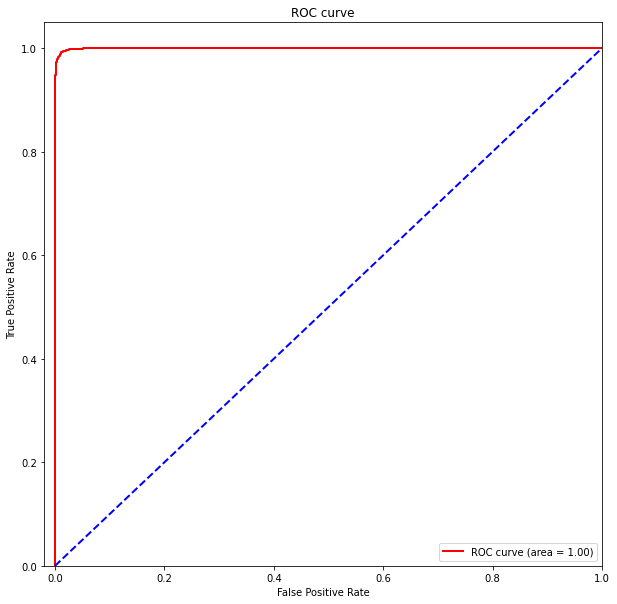

In [35]:
# Compute micro-average ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test.values, pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,10))
lw = 2
plt.plot(fpr, tpr, color='red',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

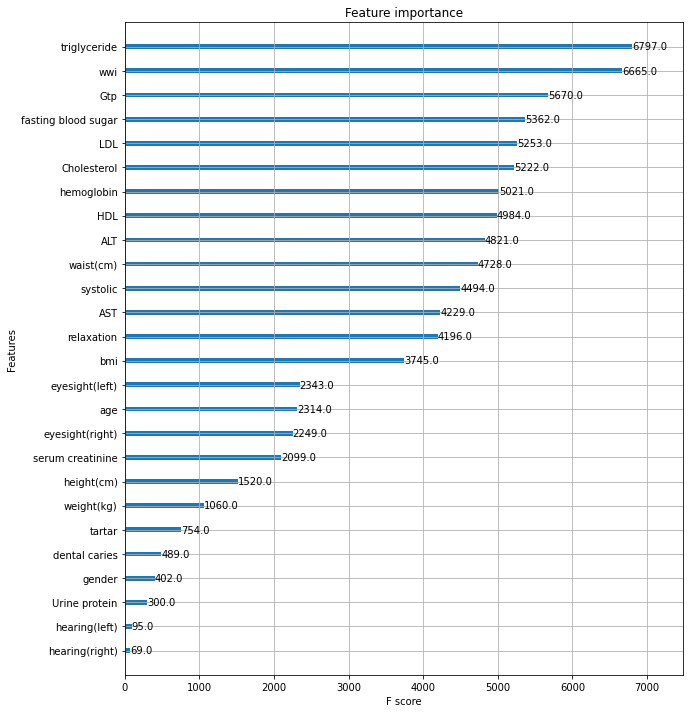

In [36]:
fig, ax = plt.subplots(figsize=(10,12)) # 축 반환
plot_importance(xgb_model,ax=ax)

In [39]:
!pip install graphviz

  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)


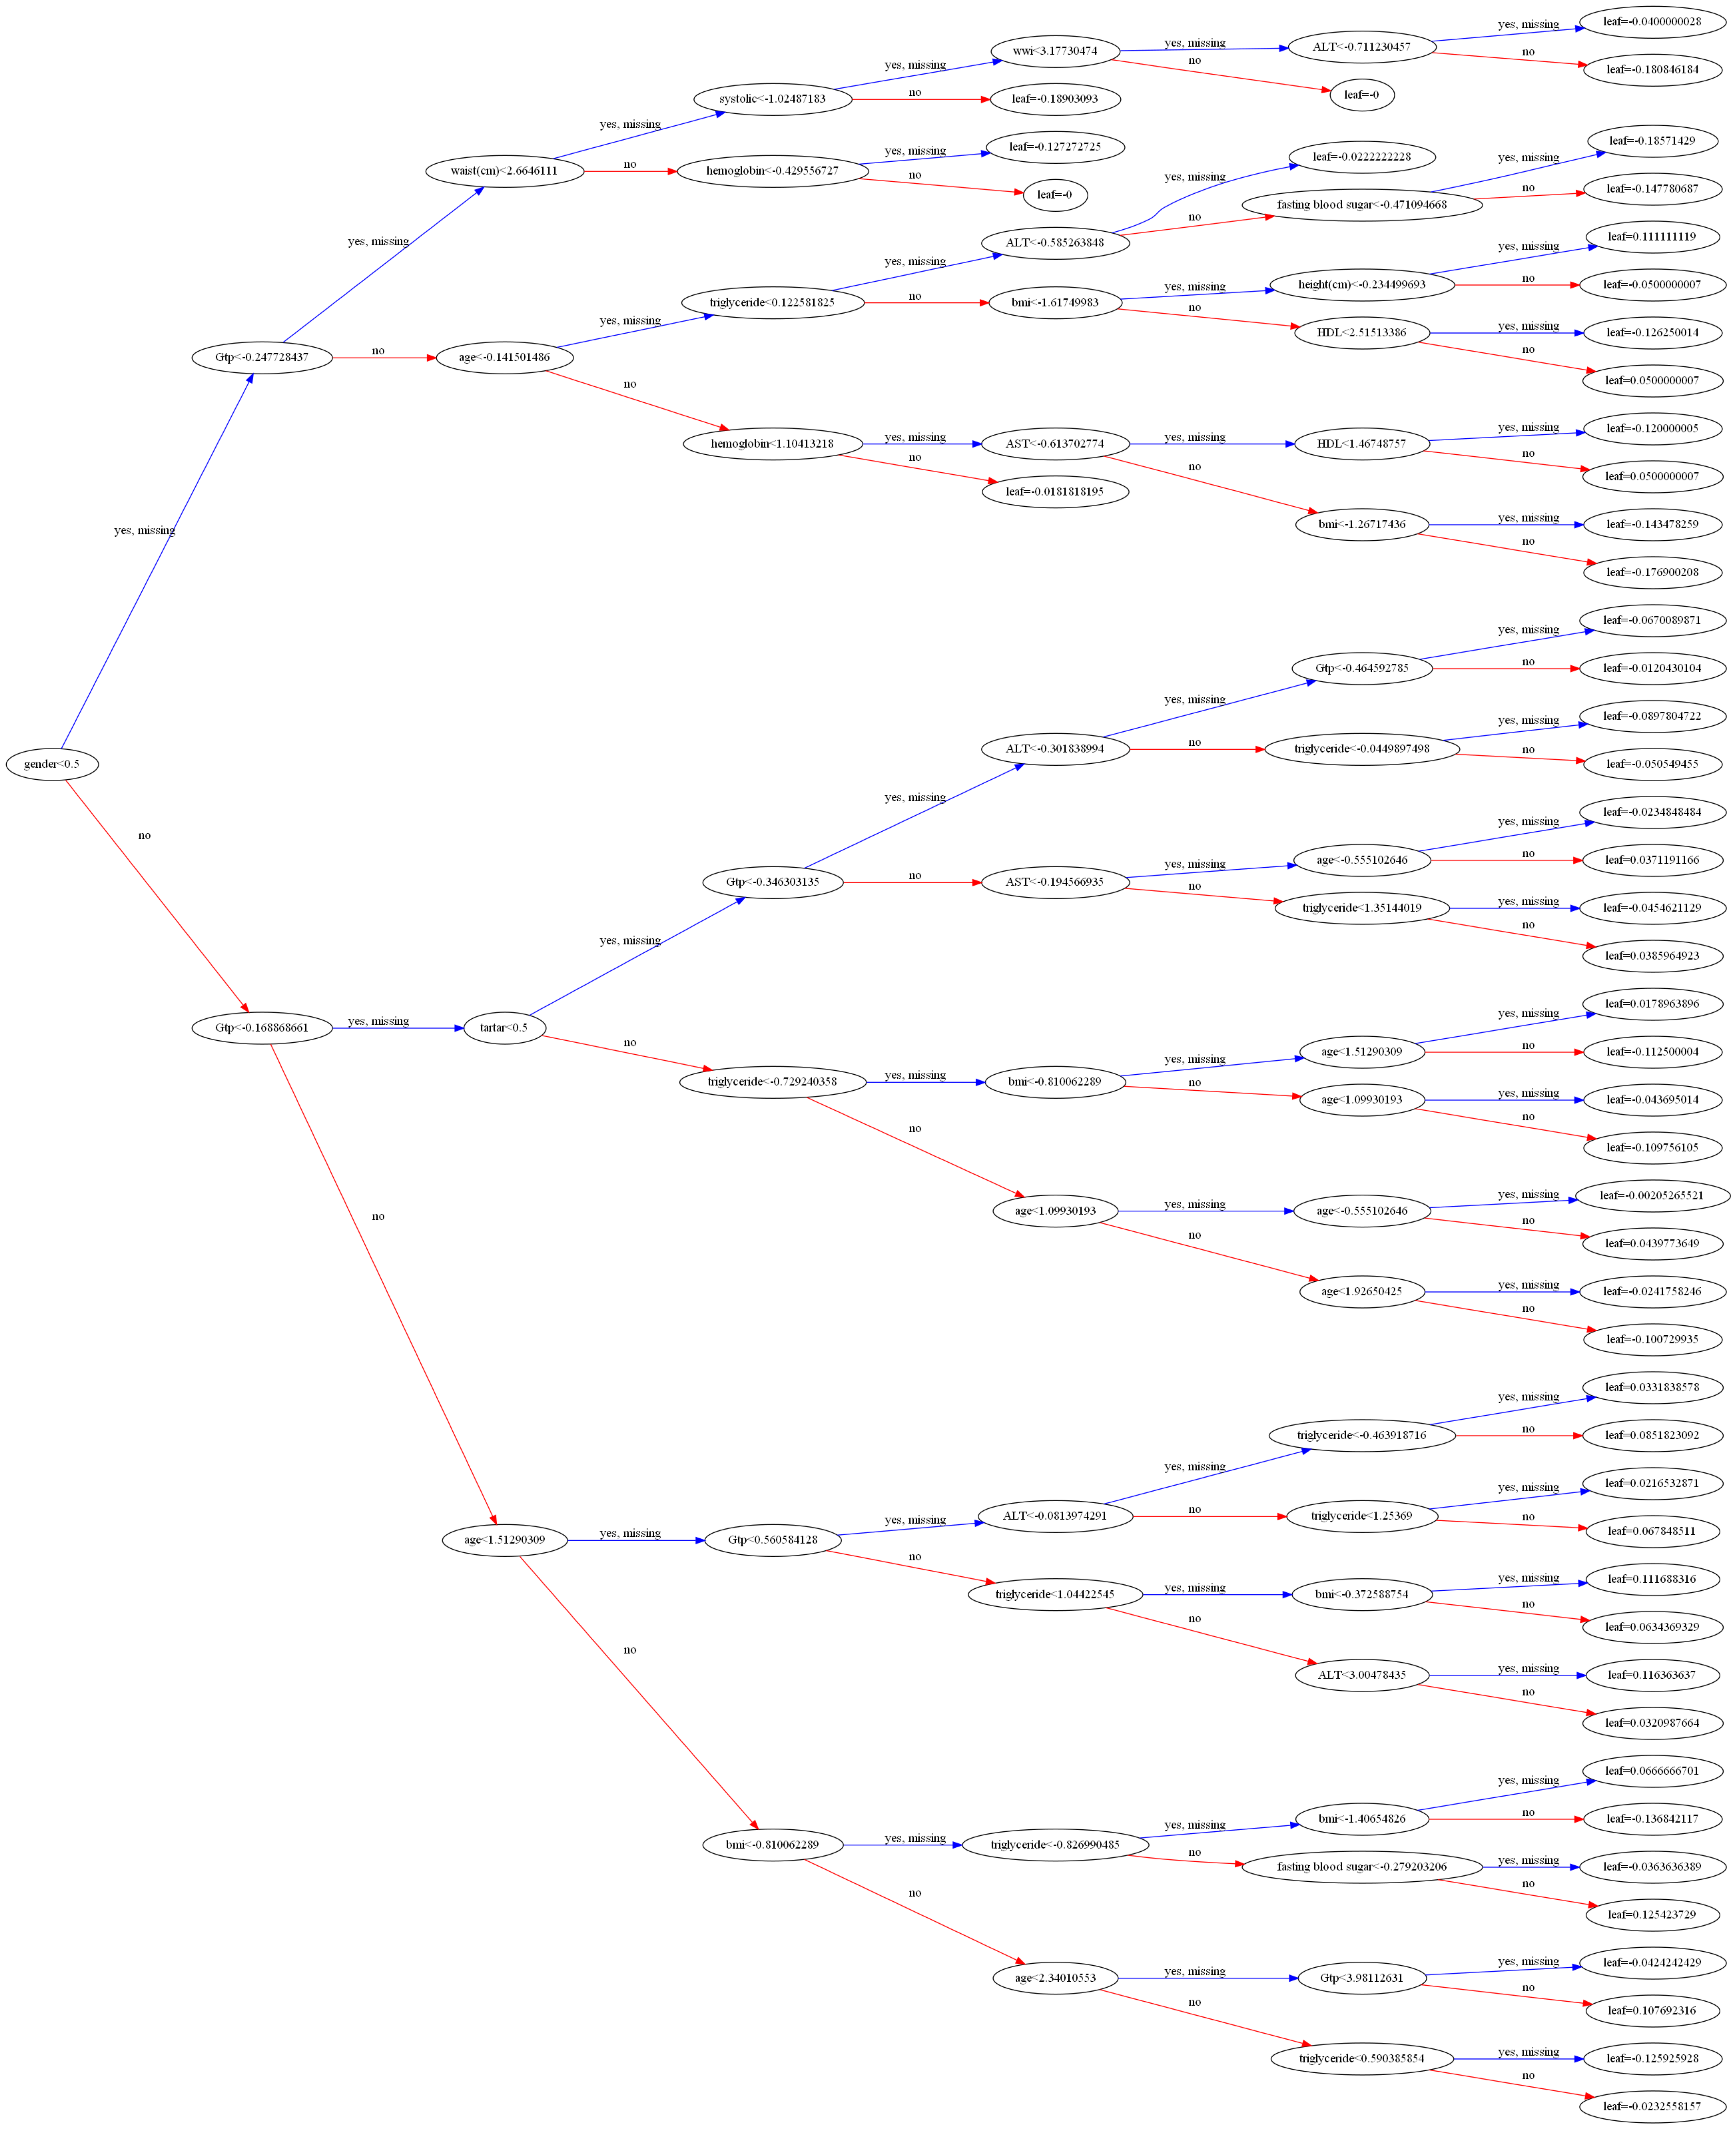

In [40]:
# num_trees : 그림을 여러개 그릴시 그림 번호
# rankdir : 트리의 방향, 디폴트는 위아래 방향
# rankdir="LR" : 왼쪽에서 오른쪽 방향으로 트리를 보여준다.
xgb.plot_tree(xgb_model, num_trees=0, rankdir='LR')

fig = plt.gcf()
fig.set_size_inches(150, 100)

# 이미지 저장하고 싶다면
# fig.savefig('xgb_tree_py_wp.png')

plt.show()

#### 2.2 Scikit-leran wrapper를 사용한 XGB 모델

In [41]:
# # Initiate XGBoost Classifier
# xgb_clf = XGBClassifier(learning_rate=0.1,n_estimators=2000,max_depth=3,
#                         silent=True,
#                         objective='binary:logistic',
#                         booster='gbtree',
#                         n_jobs=1,
#                         nthread=None,
#                         gamma=0,
#                         min_child_weight=1,
#                         max_delta_step=0,
#                         subsample=1,
#                         colsample_bytree=1,
#                         colsample_bylevel=1,
#                         reg_alpha=0,
#                         reg_lambda=1,
#                         scale_pos_weight=1,
#                         base_score=0.5,
#                         random_state=0,
#                         seed=None,
#                         missing=None)
# # Print default setting
# xgb_clf.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': None,
 'colsample_bytree': 1,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': 0,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.1,
 'max_bin': None,
 'max_cat_to_onehot': None,
 'max_delta_step': 0,
 'max_depth': 3,
 'max_leaves': None,
 'min_child_weight': 1,
 'missing': None,
 'monotone_constraints': None,
 'n_estimators': 2000,
 'n_jobs': 1,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': None,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None,
 'silent': True,
 'nthread': None,
 'seed': None}

In [52]:
# Train the model
start = time.time()
xgb_clf = XGBClassifier(learning_rate=0.1,n_estimators=2000,max_depth=3,
                        silent=True,
                        objective='binary:logistic',
                        booster='gbtree',
                        n_jobs=1,
                        nthread=None,
                        gamma=0).fit(x_train,y_train)
# Make prediction
xgb_pred = xgb_clf.predict(x_test)
# Get predicted probability
xgb_pred_probs = xgb_clf.predict_proba(x_test)[:,1]
end = time.time()
print("XGB 수행 시간: {0:.1f} 초 ".format(end - start)) # 
print('분류 결과 : {0:.1f} '.format(accuracy_score(y_test,xgb_pred)))

XGB 수행 시간: 43.9 초 
분류 결과 : 0.8 


In [53]:
from sklearn.metrics import precision_recall_fscore_support as score
# Get performance metrics
precision, recall, fscore, support = score(y_test, xgb_pred)
accuracy = accuracy_score(y_test,xgb_pred)
# Print result
print(f'The recall value for the baseline xgboost model is {recall[1]:.4f}')
print(f'The accuracy value for the baseline xgboost model is {accuracy:.4f}')

The recall value for the baseline xgboost model is 0.7775
The accuracy value for the baseline xgboost model is 0.8291


In [56]:
get_clf_eval(y_test, xgb_pred, xgb_pred_probs)

오차 행렬
[[6045  991]
 [ 913 3190]]
정확도: 0.8291, 정밀도: 0.7630, 재현율: 0.7775,F1: 0.7702, AUC:0.9121


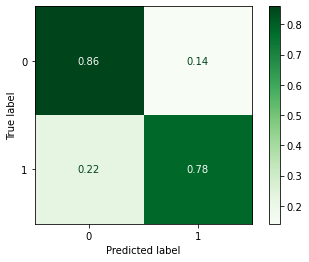

In [54]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xgb_clf, x_test, y_test, cmap = plt.cm.Greens, normalize = "true")

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

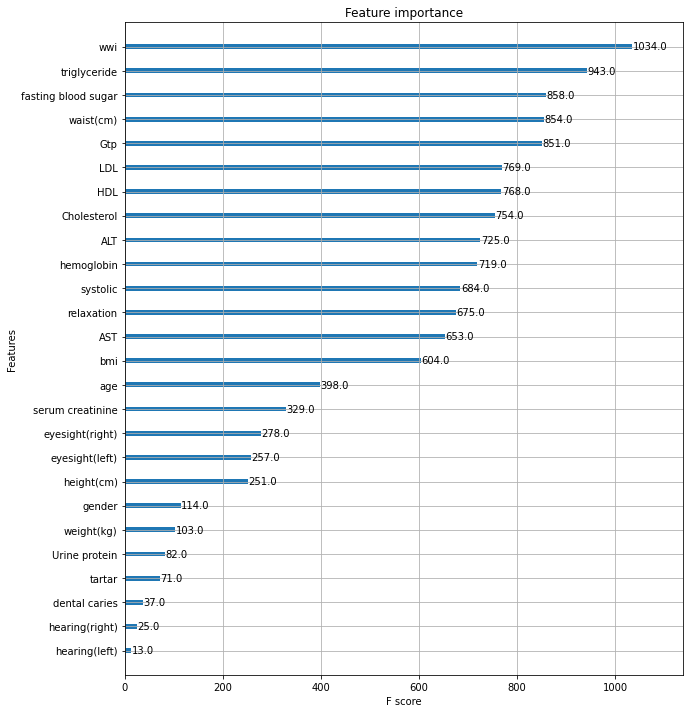

In [57]:
fig, ax = plt.subplots(figsize=(10,12)) # 축 반환
plot_importance(xgb_clf,ax=ax)

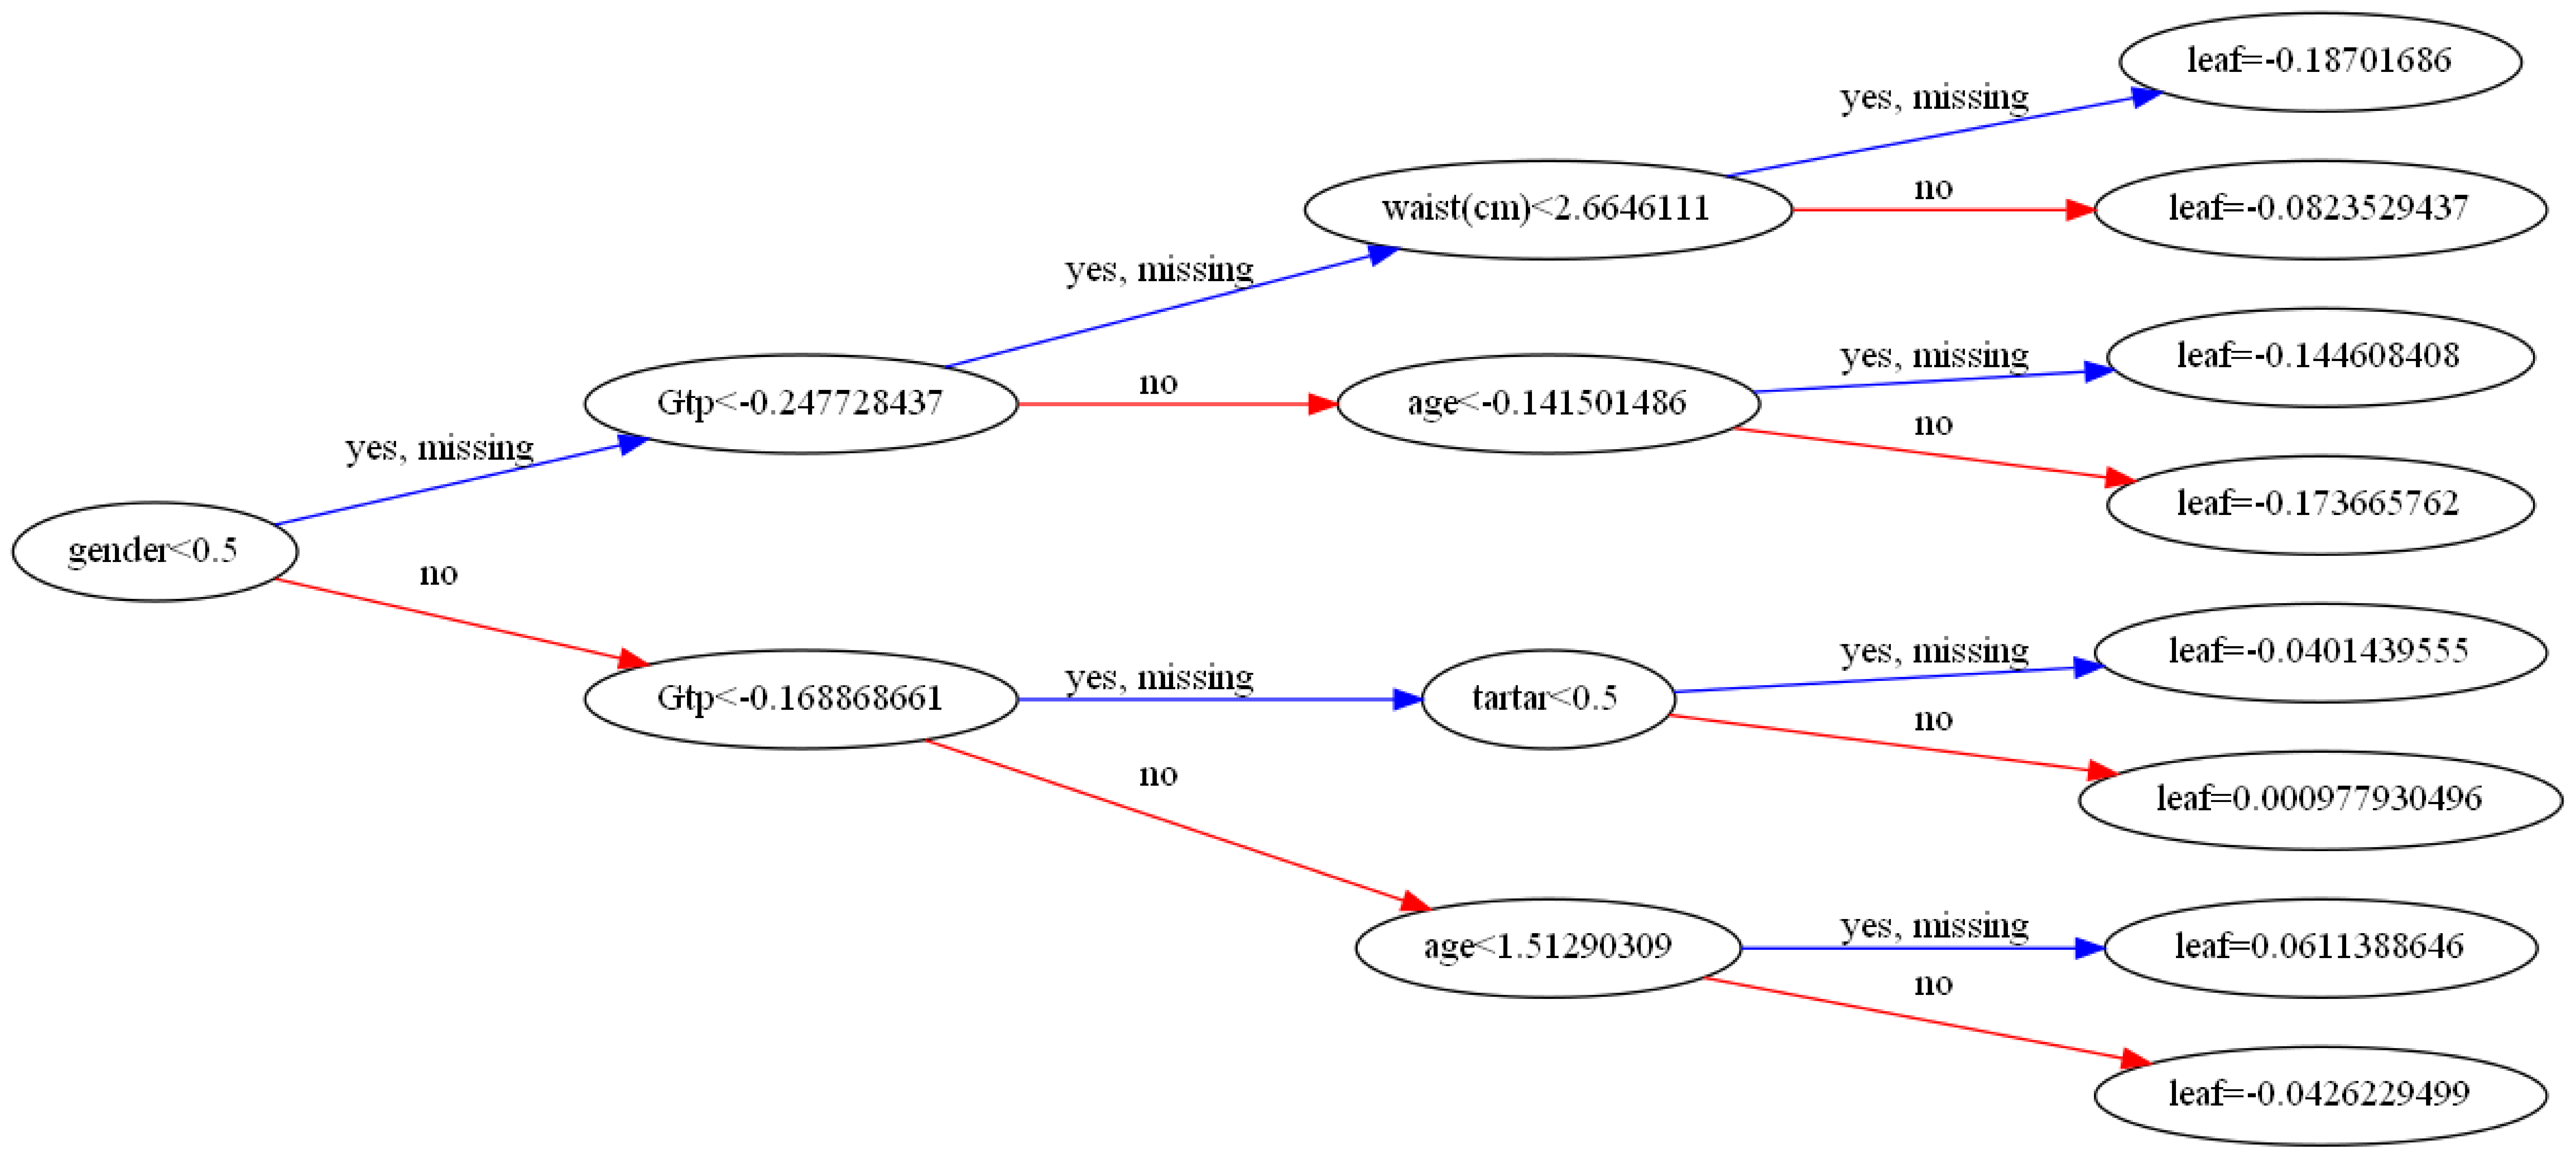

In [55]:
# num_trees : 그림을 여러개 그릴시 그림 번호
# rankdir : 트리의 방향, 디폴트는 위아래 방향
# rankdir="LR" : 왼쪽에서 오른쪽 방향으로 트리를 보여준다.
xgb.plot_tree(xgb_clf, num_trees=0, rankdir='LR')

fig = plt.gcf()
fig.set_size_inches(150, 100)

# 이미지 저장하고 싶다면
# fig.savefig('xgb_tree_skl_wp.png')

plt.show()

## 3. Light GBM

In [64]:
# !pip install lightgbm

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



     ---------------------------------------- 1.0/1.0 MB 8.1 MB/s eta 0:00:00


In [65]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
from lightgbm import plot_importance # for visualization about features' importance by using plot_importance()

lgbm = LGBMClassifier(n_estimators=2000)
evals = [(x_test,y_test)]

start = time.time()
# 학습 : 조기중단 수행(100)
lgbm.fit(x_train,y_train, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals, verbose=True)

# 예측
preds = lgbm.predict(x_test)
pred_probs = lgbm.predict_proba(x_test)[:, 1]
end = time.time()
print("LGBM 수행 시간: {0:.1f} 초 ".format(end - start)) # 3.5 sec
print('분류 결과 : {0:.1f} '.format(accuracy_score(y_test,preds)))

[1]	valid_0's binary_logloss: 0.627345
[2]	valid_0's binary_logloss: 0.601698
[3]	valid_0's binary_logloss: 0.580185
[4]	valid_0's binary_logloss: 0.562217
[5]	valid_0's binary_logloss: 0.546808
[6]	valid_0's binary_logloss: 0.533569
[7]	valid_0's binary_logloss: 0.522254
[8]	valid_0's binary_logloss: 0.512499
[9]	valid_0's binary_logloss: 0.503991
[10]	valid_0's binary_logloss: 0.496719
[11]	valid_0's binary_logloss: 0.490056
[12]	valid_0's binary_logloss: 0.484398
[13]	valid_0's binary_logloss: 0.479348
[14]	valid_0's binary_logloss: 0.474888
[15]	valid_0's binary_logloss: 0.470878
[16]	valid_0's binary_logloss: 0.46752
[17]	valid_0's binary_logloss: 0.464466
[18]	valid_0's binary_logloss: 0.461672
[19]	valid_0's binary_logloss: 0.459099
[20]	valid_0's binary_logloss: 0.456873
[21]	valid_0's binary_logloss: 0.454595
[22]	valid_0's binary_logloss: 0.452703
[23]	valid_0's binary_logloss: 0.450828
[24]	valid_0's binary_logloss: 0.449214
[25]	valid_0's binary_logloss: 0.447655
[26]	valid

In [66]:
lgbm.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 2000,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

#### 3.2 평가지표 시각화(오차행렬, ROC curve)

In [67]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [68]:
get_clf_eval(y_test, preds, pred_probs)

오차 행렬
[[6980   56]
 [  42 4061]]
정확도: 0.9912, 정밀도: 0.9864, 재현율: 0.9898,F1: 0.9881, AUC:0.9997


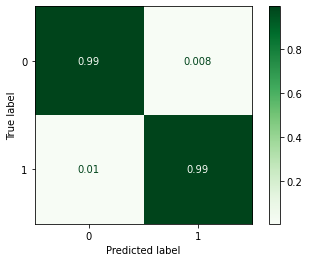

In [69]:
plot_confusion_matrix(lgbm, x_test, y_test, cmap = plt.cm.Greens, normalize = "true")

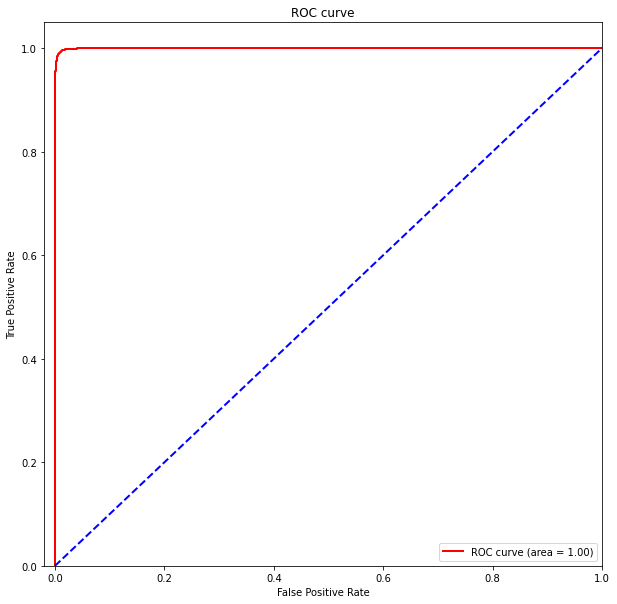

In [71]:
# Compute micro-average ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test.values, pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,10))
lw = 2
plt.plot(fpr, tpr, color='red',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

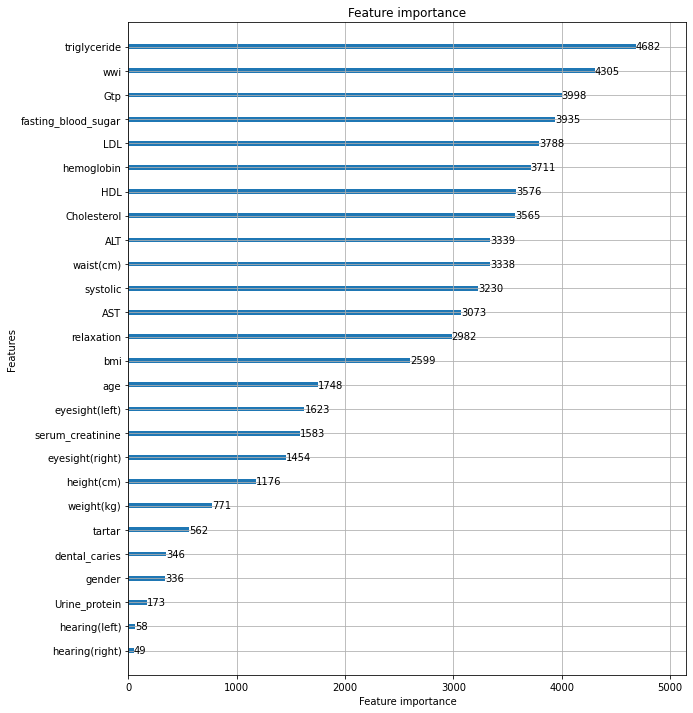

In [73]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm, ax=ax,importance_type='split')

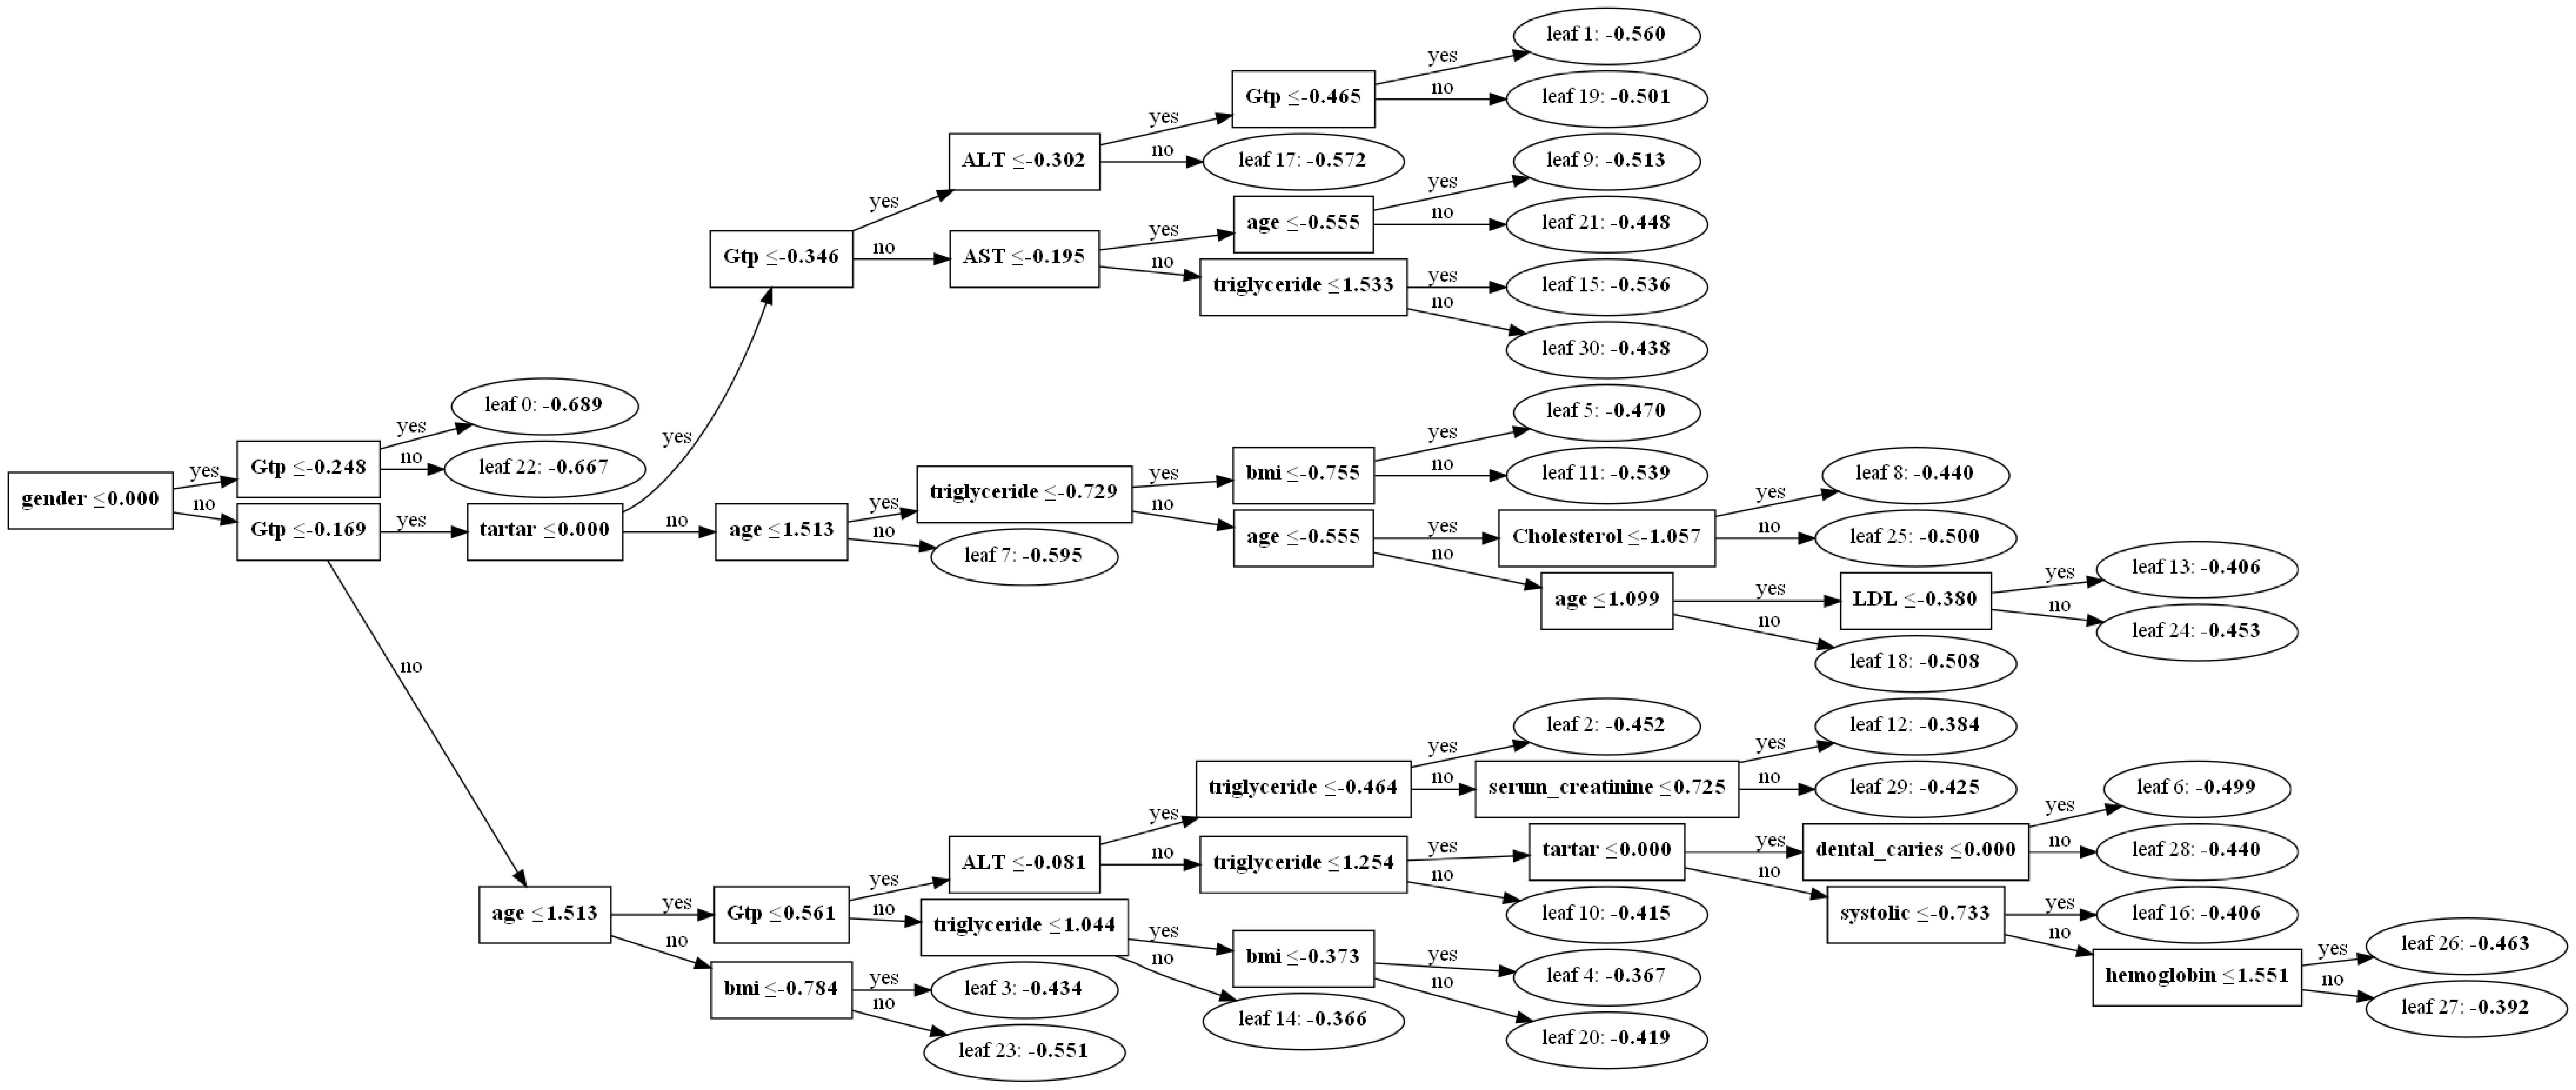

In [74]:
import lightgbm as lgb
lgb.plot_tree(lgbm)

fig = plt.gcf()
fig.set_size_inches(150, 100)

# 이미지 저장하고 싶다면
# fig.savefig('lgbm_tree.png')

plt.show()